<a href="https://colab.research.google.com/github/anushapalisetty/Intel-Image-Classification/blob/main/Resnet_of_ImageClassification_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import os
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path="/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/"

In [ ]:
def loadImages(path,classes):
    '''Put files into lists and return them as one list with all images 
     in the folder'''
    image_files = sorted([os.path.join(path, classes, file)
                          for file in os.listdir(path + classes)
                          if file.endswith('.jpg')])
    return image_files

In [ ]:
classes=['buildings', 'forest' , 'glacier' , 'mountain', 'sea', 'street']
classes1=['buildings', 'forest' , 'glacier' , 'mountain', 'sea', 'street']
for i in range(len(classes)):
  classes1[i]=loadImages(path,classes[i])
  print(f'length of {classes[i]} is {len(classes1[i])}')

length of buildings is 2200
length of forest is 2281
length of glacier is 2404
length of mountain is 2522
length of sea is 2284
length of street is 2382


In [ ]:
%time
build_img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in classes1[4][:20]]

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


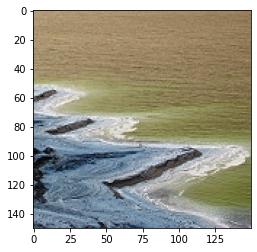

In [ ]:
plt.imshow(build_img[13])

In [ ]:
build_img[3].shape

(150, 150, 3)

In [ ]:
## Data Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2, horizontal_flip=True,shear_range=0.2,
    zoom_range=0.2, validation_split=0.1)
#test_datagen = ImageDataGenerator(rescale = 1./255.)
test_datagen = ImageDataGenerator()

In [ ]:
train_data_generator=train_datagen.flow_from_directory(
      '/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/',
      target_size=(150,150),
      batch_size=64,
      class_mode='sparse',
      seed=2000,
      subset='training'
    
)

validation_data_generator=train_datagen.flow_from_directory(
      '/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/',
      target_size=(150,150),
      batch_size=64,
      class_mode='sparse',
      seed=2000,
      subset='validation'
    
)

test_data_generator=test_datagen.flow_from_directory(
      '/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_test/seg_test/',
      target_size=(150,150),
      batch_size=64,
      class_mode='sparse',
      seed=2000
)

Found 12667 images belonging to 6 classes.
Found 1406 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
SEED = 2000
batch_size = 128
os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
rn.seed(SEED)

In [ ]:
from keras.layers import *
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
import numpy as np 
from keras.applications.resnet50 import ResNet50
import keras

resnet_weights="/content/drive/My Drive/Colab Notebooks/DL_Project_Data/resnet50_weights_tf_dim_ordering_tf_kernels.h5"

base_model2=ResNet50(include_top=True, weights="imagenet",  input_shape=(224,224,3))
base_model2.trainable = False

x = Dense(512, activation='relu')(base_model2.output)
x = Dropout(0.5)(x)
x = Dense(6, activation='softmax')(x)

transfer_model2 = Model(base_model2.input, x) 
transfer_model2.compile(optimizer =keras.optimizers.SGD(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

102973440/102967424 [==============================] - 3s 0us/step


In [ ]:
train_data_gen_resnet=train_datagen.flow_from_directory(
      '/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/',
      target_size=(224,224),
      batch_size=128,
      class_mode='sparse',
      seed=2000,
      subset='training'
    
)

validation_data_gen_resnet=train_datagen.flow_from_directory(
      '/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_test/seg_test/',
      target_size=(224,224),
      batch_size=128,
      class_mode='sparse',
      seed=2000,
      subset='validation'
    
)

test_data_gen_resnet=test_datagen.flow_from_directory(
      '/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_pred/seg_pred/',
      target_size=(224,224),
      batch_size=64,
      class_mode=None,
      seed=2000
)

Found 12667 images belonging to 6 classes.
Found 298 images belonging to 6 classes.
Found 0 images belonging to 0 classes.


In [ ]:
import tensorflow as tf
reduce = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, mode='auto')
history3 = transfer_model2.fit_generator(
            train_data_gen_resnet,
           # steps_per_epoch=int(12632/32),
            epochs=50,
            validation_data=validation_data_gen_resnet,
            #validation_steps=int(1402/32),
            callbacks=[reduce]
            verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
99/99 [==============================] - 8315s 84s/step - loss: 1.7919 - accuracy: 0.1667 - val_loss: 1.7918 - val_accuracy: 0.1779
Epoch 2/50
99/99 [==============================] - 1839s 19s/step - loss: 1.7918 - accuracy: 0.1719 - val_loss: 1.7918 - val_accuracy: 0.1812
Epoch 3/50
99/99 [==============================] - 1836s 19s/step - loss: 1.7918 - accuracy: 0.1665 - val_loss: 1.7918 - val_accuracy: 0.1745
Epoch 4/50
99/99 [==============================] - 1833s 19s/step - loss: 1.7918 - accuracy: 0.1629 - val_loss: 1.7918 - val_accuracy: 0.1745
Epoch 5/50
99/99 [==============================] - 1835s 19s/step - loss: 1.7917 - accuracy: 0.1712 - val_loss: 1.7917 - val_accuracy: 0.1745
Epoch 6/50
99/99 [==============================] - 1842s 19s/step - loss: 1.7917 - accuracy: 0.1697 - val_loss: 1.7917 - val_accuracy: 0.1745
Epoch 7/50
99/99 [==============================] - 1847s 19s/step

KeyboardInterrupt: ignored

In [ ]:
transfer_model2.save('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/model1_ResNet')

In [ ]:
transfer_model2.save('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/model1_ResNet.hd5')

In [ ]:
import pandas as pd
df_resnet = pd.DataFrame(history3.history)  
    
# saving the dataframe  
df_resnet.to_csv('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/RESNET_History.csv')  

In [ ]:
from keras.applications.densenet import DenseNet121
import keras


base_model1=DenseNet121(include_top=False, weights= 'imagenet',  input_shape=(150,150,3), pooling='avg')
base_model1.trainable = False

x = Dense(256, activation='relu')(base_model1.output)
x = Dropout(0.5)(x)
x = Dense(6, activation='softmax')(x)

transfer_model1 = Model(base_model1.input, x) 
transfer_model1.compile(optimizer =keras.optimizers.SGD(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
import tensorflow as tf
reduce = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, mode='auto')
history2 = transfer_model1.fit_generator(
            train_data_generator,
            #steps_per_epoch=int(12632/64),
            epochs=50,
            validation_data=validation_data_generator,
            #validation_steps=int(1402/64),
            callbacks=[reduce],
            verbose=1)

In [ ]:
transfer_model1.save('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/model1')

In [ ]:
transfer_model1.save('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/model.hd5')

In [ ]:
transfer_model1.summary()

In [ ]:
%time
# history=model.fit_generator(
#         train_data_generator,
#         #steps_per_epoch=12667 // batch_size,
#         epochs=10,
#         validation_data=validation_data_generator,
#         #validation_steps=1406 // batch_size
#         #callbacks=[reduce],
#         )

In [ ]:
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import keras
model = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/model.hd5')

In [ ]:
accuracy=model.evaluate_generator(test_data_generator,steps=len(test_data_generator) //32,verbose=2)
print('Accuracy of the model on the test set: ',accuracy[1])
accuracy

1/1 - 0s - loss: 7.6619 - accuracy: 0.6094
Accuracy of the model on the test set:  0.609375


[7.661888122558594, 0.609375]

In [ ]:
#img= '/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_pred/seg_pred/georgia-state-university-1.png'
#img= '/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_pred/seg_pred/Anusha-Sea.jpeg'
img= '/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_pred/seg_pred/Pooru-Mountain.jpeg'

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img=cv2.imread(img)
img=cv2.resize(img, (150,150))
plt.imshow(img.reshape([150,150,3]))
img = np.reshape(img,[1,150,150,3])

In [ ]:
model.predict(img).round(2)

In [ ]:
['buildings', 'forest' , 'glacier' , 'mountain', 'sea', 'street']